In [65]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path

In [66]:
GCP_FILES = ["01ON630.tif.points", "02ON919.tif.points", "03ON921.tif.points", "04ON618.tif.points", "05ON612.tif.points",  "06ON911.tif.points"]
GCP_FOLDER = "/ofo-share/repos-david/geospatial-data-registration-toolkit/scratch/GCPs"
GCP_ID = 0 # Which file to select

GCP_FILEPATH = Path(GCP_FOLDER,GCP_FILES[GCP_ID])

In [67]:
df = pd.read_csv(GCP_FILEPATH, delimiter=",", skiprows=1)

In [68]:
map_points = gpd.GeoSeries.from_xy(x = df.mapX, y=df.mapY, crs=3310)
source_points = gpd.GeoSeries.from_xy(x = df.sourceX, y=df.sourceY, crs=3310)

Show the two sets of points and the shift between them, scaled by 100 times.

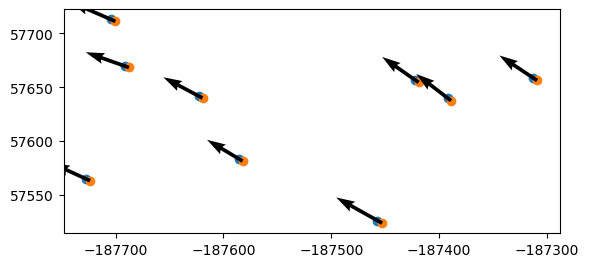

In [69]:
_, ax = plt.subplots()

map_points.plot(ax=ax, )
source_points.plot(ax=ax)

map_coords = map_points.get_coordinates().to_numpy()
source_coords = source_points.get_coordinates().to_numpy()

directions = map_coords - source_coords
for dir, source_coord in zip(directions, source_coords):
    ax.quiver(source_coord[0], source_coord[1], dir[0], dir[1],  scale=10e-2, units="xy")

plt.show()